# La regresión lineal simple

Es una aproximación lineal para predecir respuestas cuantitativas entre una variable X y una Y. Ya que asume que hay una relación lineal entre ambas. 

### Importamos las librerías

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import seaborn as sn
##  scipy==1.2.1
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 01. Exploración de los datos 
Vamos a trabajar con la base de datos llamada Boston. Esta base de datos contiene información proveniente del U.S Census Service sobre vivienda en Boston en 1978. 
y contiene las siguientes variables: 

- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de tierra residencial zonificada para lotes de más de 25,000 pies cuadrados.
- INDUS: proporción de acres de negocios no minoristas por ciudad.
- CHAS: Variable ficticia del río Charles (1 si el trecho delimita el río; 0 de lo contrario)
- NOX: concentración de óxido nitroso(partes por 10 millones)
- RM: número promedio de habitaciones por vivienda
- EDAD: proporción de unidades ocupadas por el propietario construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a autopistas radiales
- TAX: tasa de impuesto a la propiedad de valor total por 10,000
- PTRATIO: Proporción alumno-profesor por ciudad 
- NEGRO: 1000 (Bk - 0,63) ^ 2 donde Bk es la proporción de negros por ciudad
- LSTAT: porcentaje de población de bajos ingresos
- MEDV: valor medio de las viviendas ocupadas por sus propietarios en 1000

Ahora vamos a importar con Pandas la base de datos y delimitar la primer columan como índice


In [105]:
Boston = pd.read_csv('Boston.csv', header=0)

Para explorar la base de datos y obtener una lista de ls columnas en la tabla usaremos el comando: 

```python 
list(Boston)
```

In [3]:
list(Boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

El objetivo de usar esta base de datos es responder a la pregunta :
- ¿Cuáles son las variables que pueden predecir el precio medio de las viviendas?. 

Por lo que nuestra variable dependiente será 'medv'. 
Para identificar la distribución de esta variable vamos a graficarla. Y observaremos que presenta una distribución normal. 

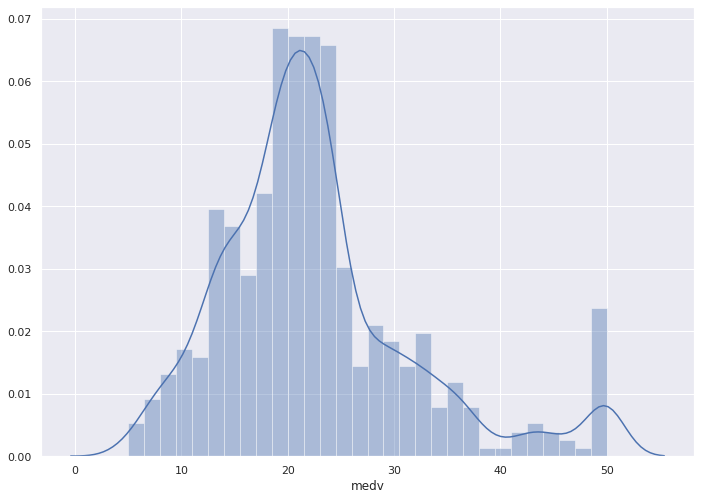

In [61]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.distplot(Boston['medv'], bins=30)
plt.show()

Como parte de la fase exploratoria de datos es necesario identificar qué variables tienen una relación lineal con la variable dependiente, por lo que graficaremos la matríz de correlación. El coeficiente de correlación varía entre -1 to 1. Donde los valores que se encuentran cerca del 1 tienen una correlación positiva y cuando es cercano a -1 las variables tienen una fuerte correlación negativa. 

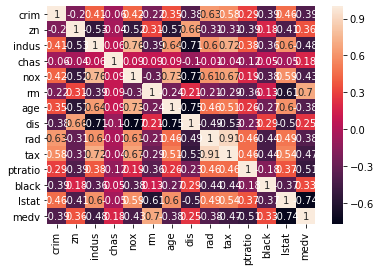

In [58]:
correlation_matrix = Boston.corr().round(2)
# annot = True to print the values inside the square
sn.heatmap(data=correlation_matrix, annot=True)

Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo MEDV. Al observar la matriz de correlación, podemos ver que la RM tiene una fuerte correlación positiva con MEDV (0.7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0.74).
Un punto importante en la selección de características para un modelo de regresión lineal es verificar la multi-co-linealidad. Las características RAD, TAX tienen una correlación de 0.91. Estos pares de características están fuertemente correlacionados entre sí. No debemos seleccionar estas dos características juntas para entrenar el modelo. Lo mismo ocurre con las características DIS y AGE que tienen una correlación de -0.75. De lo anterior se deduce que para ajustar el modelo se usarán las variables LSTAT y RM.

Si graficamos ambas variables observaremos que LSTAT decrece con forme incrementa el valor medio de la propiedad (MED) a diferencia de RM.

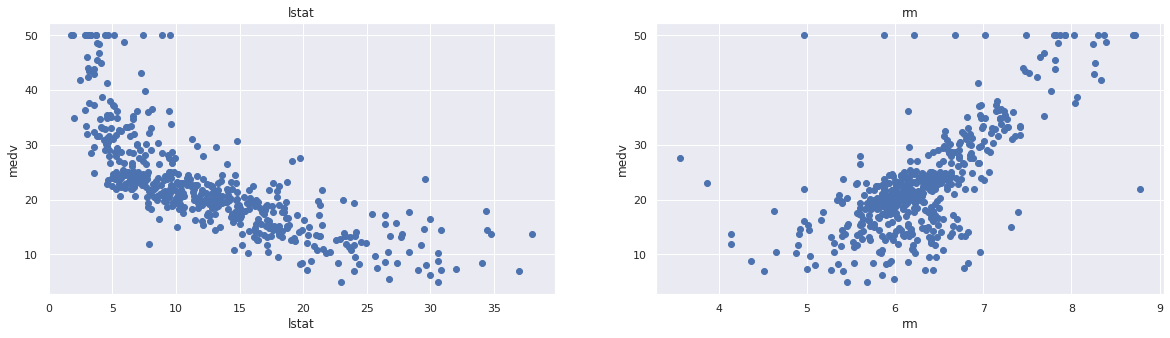

In [74]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = Boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

# 02. Entrenamiento del modelo

Para comenzar a entrenar el modelo es necesario crear las variables dependiente e independientes.

In [84]:
X = pd.DataFrame(Boston['lstat'])
Y = Boston['medv']

Para poder comenzar a entrenar el modelo, vamos a usar el 80% de los datos como muestra de entrenamient y el 20}5 restante para validación.  

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


Ahora entrenamos y ajustamos el modelo con la función: 

 
```python

LinearRegression()

```

In [86]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 03. Evaluación del modelo

Evaluaremos nuestro modelo utilizando RMSE y R2-score.

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.5523019908037391


The model performance for testing set
--------------------------------------
RMSE is 6.2307165730986815
R2 score is 0.5041523728903132


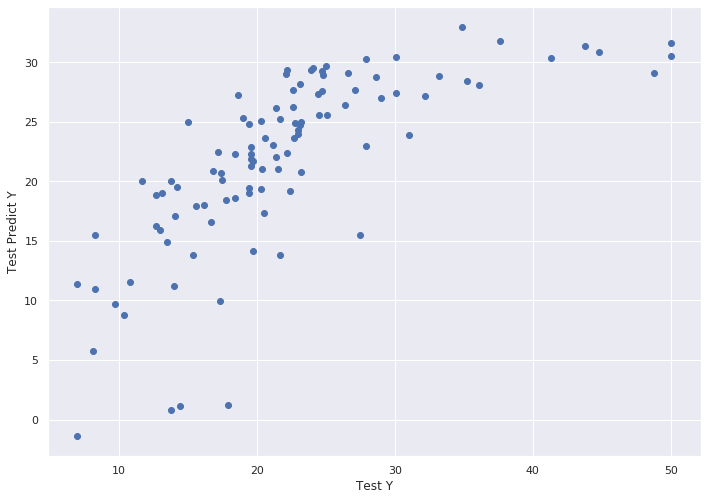

In [113]:
plt.scatter(Y_test, y_test_predict)
plt.xlabel("Test Y")
plt.ylabel("Test Predict Y")
plt.show()
#plt.show()
#Boston.plot(kind='scatter', x='y_train_predict', y='y_test_predict')
#X_new = pd.DataFrame({'lstat': [Boston.lstat.min(), Boston.lstat.max()]})


In [107]:
lm = smf.ols('Y~X', data = Boston).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 30 Jun 2019   Prob (F-statistic):           5.08e-88
Time:                        22:18:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
X             -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import holoviews as hv
from holoviews import dim
from scipy import stats
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [47]:
#%%opts Curve (line_width=1, color='#24406d')
#plot_opts = {'show_grid':  True,
#             'width': 900,
#             'height': 1200}
#style_opts = {'color': 'medv',
#              'size': dim('lstat')}

#scatter = hv.Scatter(Boston, kdims= ['lstat'], vdims=['medv'])
#scatter = scatter.opts(color=', s=dim('lstat'))
#scatter = scatter.opts(style=style_opts, plot=plot_opts)

#regression_line = hv.Curve(('lstat', 'medv'),
#                           kdims= ['lstat'],
#                           vdims=['medv'])
#scatter + regression_line

#reg = hv.DynamicMap(preds, kdims=['lstat', 'medv'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


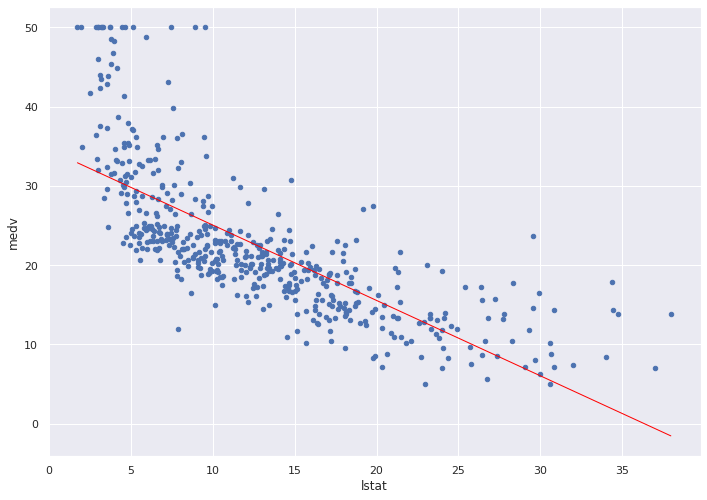

In [110]:
Boston.plot(kind='scatter', y='medv', x='lstat')
plt.plot(X_new, preds, c='red', linewidth=1)
plt.show()